In [1]:
# This is a configuration step for the exercise. Please run it before the simulation code!
# Imports of python modules 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from operator import sub

from gll import gll
from lagrange1st import lagrange1st 
from legendre import legendre 
from ricker import ricker 
import time

# Show the plots in the Notebook.
plt.switch_backend("nbagg")

In [2]:
def lagrange(N,i,x):

# Program to calculate  Lagrange polynomial for order N
# and polynomial i [0, N] at location x

    from gll import gll

    [xi, weights] =  gll(N)
    fac = 1
    for j in range (-1,N): 
        if j != i:
            fac=fac*((x-xi[j+1])/(xi[i+1]-xi[j+1]))
    x = fac

    return x

In [3]:
# Initialization of setup
# ---------------------------------------------------------------
nt = 3500          # number of time steps
xmax = 1000.       # Length of domain
vs = 2500.          # [m/s] S velocity for homogeneneous medium
rho = 2500          # [kg/m3] Density for homogeneous model
mu = rho * vs**2    # Initialization of shear modulus mu
N = 2               # Order of Lagrange polynomials THIS WAS ORIGINALLY 5
ne = 800            # Number of elements
Tdom = .2           # Dominant period of Ricker source wavelet
iplot = 20          # Plotting each iplot snapshot

# variables for elemental matrices
Me = np.zeros(N+1, dtype =  float)
Ke = np.zeros([N+1, N+1], dtype =  float)

# ----------------------------------------------------------------

# Initialization of GLL points integration weights
[xi, w] = gll(N)    # xi -> N+1 coordinates [-1 1] of GLL points
                    # w Integration weights at GLL locations
# Space domain
le = xmax/ne       # Length of elements


# Vector with GLL points  
k=0
xg = np.zeros((N*ne)+1) 
xg[k] = 0
for i in range(1,ne+1):
    for j in range(0,N):
        k = k+1
        xg[k] = (i-1)*le+.5*(xi[j+1]+1)*le
print(xg)
# ---------------------------------------------------------------
# Calculation if time step is according to Courant criterion

dxmin = min(np.diff(xg))  
eps = 0.1           # Courant value
dt = eps*dxmin/vs   # Global time step

print('The Courant value for order %g is %g' %(N, eps))

# Mapping - Jacobian
J = le/2 
Ji = 1/J             # Inverse Jacobian

# Initialization of 1st derivative of Lagrange polynomials
l1d = lagrange1st(N)   # Array with GLL as columns for each N+1 polynomial

# -----------------------------------------------------------------
# Initialization of system matrices
# -----------------------------------------------------------------

# Mass matrix
# Elemental
for i in range(-1, N):
    Me[i + 1] = w[i + 1] * J #only a vector since the matrix is diagonal


print('This are the diagonal entries of the Elemental Mass matrix: ')
print(Me)
print('\n')

# Global Mass matrix
k=-1
ng=(ne-1)*N+N+1
M=np.zeros(2*ng) 

for i in range(1, ne+1):  
    for j in range(0, N+1): 
        k=k+1
        if i>1:
            if j==0:
                k=k-1

        M[k]=M[k]+Me[j]

# Build inverse matrix 
Minv = np.identity(ng)
for i in range(0,ng):
    Minv[i,i]=1./M[i]
    
# ---------------------------------------------------------------
# Elemental Stiffness Matrix
for i in range(-1, N):
    for j in range(-1, N):
            Ke[i+1,j+1] =  w[j + 1] * l1d[i + 1, j + 1] 

print('This is the elemental stiffness matrix:')
print(Ke)


# Global Stiffness Matrix
K = np.zeros([ng, ng])

# Values except at element boundaries 
for k in range(1,ne+1):
    i0=(k-1)*N+1
    j0=i0
    for i in range(-1,N):
        for j in range(-1,N):
            K[i0+i,j0+j]=Ke[i+1,j+1]



# Values at element boundaries 
for k in range(2,ne+1):
    i0=(k-1)*N
    j0=i0
    K[i0,j0]=Ke[0,0]+Ke[N,N]



[  0.00000000e+00   6.25000000e-01   1.25000000e+00 ...,   9.98750000e+02
   9.99375000e+02   1.00000000e+03]
The Courant value for order 2 is 0.1
This are the diagonal entries of the Elemental Mass matrix: 
[ 0.20833333  0.83333333  0.20833333]


This is the elemental stiffness matrix:
[[-0.49999999 -0.66666667  0.16666666]
 [ 0.66666666  0.         -0.66666666]
 [-0.16666666  0.66666667  0.49999999]]


In [4]:
# Initialization of solution vectors
u = np.zeros(ng)
sigma = np.zeros(ng)

unew = u
sigmanew = sigma
f = u 

#Initial condition from FV code
sig=20;
x0=500;
sx=np.exp(-1./sig**2*(xg-x0)**2)




<IPython.core.display.Javascript object>


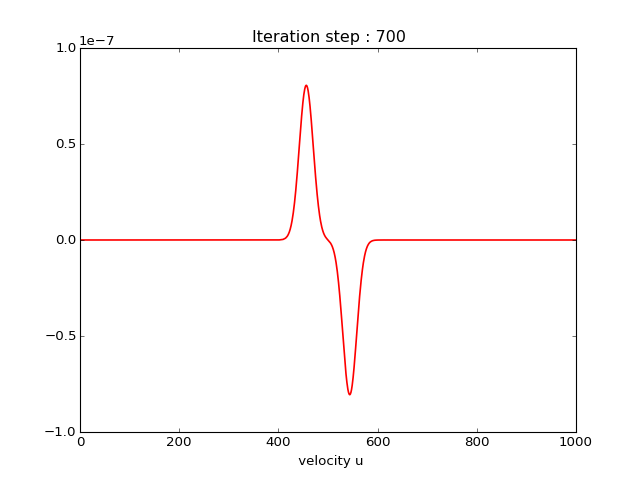

KeyboardInterrupt: 

ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent call last):
  File "/Users/lion/.miniconda3/envs/instaseis_py34/lib/python3.4/site-packages/zmq/eventloop/zmqstream.py", line 407, in _run_callback
    callback(*args, **kwargs)
  File "/Users/lion/.miniconda3/envs/instaseis_py34/lib/python3.4/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/lion/.miniconda3/envs/instaseis_py34/lib/python3.4/site-packages/IPython/kernel/zmq/kernelbase.py", line 252, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/lion/.miniconda3/envs/instaseis_py34/lib/python3.4/site-packages/IPython/kernel/zmq/kernelbase.py", line 213, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/lion/.miniconda3/envs/instaseis_py34/lib/python3.4/site-packages/IPython/kernel/zmq/kernelbase.py", line 388, in execute_request
    self._abort_queues()
  File "/Users/lion/.miniconda3/envs/instasei

In [ ]:
plt.figure()
plt.ion()

plt.title('SEM 1D Animation')
plt.xlabel(' x (m)')
plt.xlabel(' velocity u')

#Initial condition in stress
sigma = sx;
# Initialize animated plot
#lines =  axarr[0].plot(xg, u, lw=1.5, color='red')
lines = plt.plot(xg, u, lw=1.5, color = 'blue')
plt.show()

for it in range(nt): 
    # Source initialization
    #f= np.zeros(ng)
    #if it < len(src):
        #f[isrc-1] = src[it-1] 
            
    
    # Time extrapolation: Euler scheme
    unew = dt * np.dot(Minv, - (1./rho)*np.dot(K, sigma)) + u
    sigmanew = dt * np.dot(Minv, - (mu)*np.dot(K, u)) + sigma

    
    u = unew
    sigma = sigmanew
    
    # Animation plot
    if not it % iplot:
        for l in lines:
            l.remove()
            del l
        plt.title('Iteration step : %g ' %(it))
        lines = plt.plot(xg, u, color="red", lw = 1.5)
        plt.draw()
 